# Librairies

### Import usefull librairies

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
import statsmodels.api as sm

from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


from sklearn.feature_selection import RFE

import random

from sklearn import svm 
from sklearn.svm import SVC




# Explore The Dataset

### Load the dataset

In [36]:
creditcard = pd.read_csv('../creditcard.csv')
creditcard.head()       

,Time,V1,V2,V3,V4,V5,V6,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


It seems we only have numerical data, we will have a look of the types of our data

In [3]:
creditcard.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [37]:
creditcard.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

We have only numerical data, so that no need to change any types. Do we have any missing value?

In [4]:
null_cols = creditcard.isnull().sum()
null_cols[null_cols > 0]

Series([], dtype: int64)

We don't have any missing value. Let's display the heatmap to check if feature are colinear

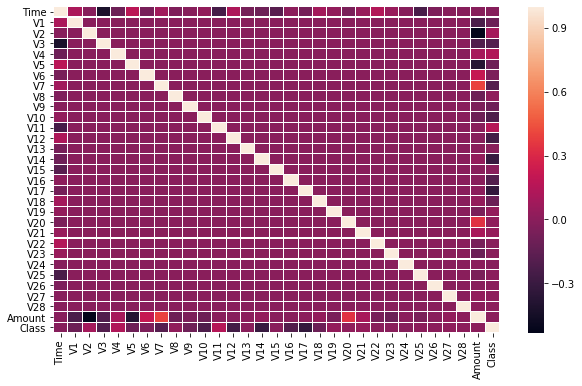

In [5]:
corr = creditcard.corr()
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr,linewidths=.1)

# Split data to have train and test

We split data to have 20% for test and 80 for train. We want to predict the Class (it is fraudulous or not)

In [6]:
len(creditcard)

284807

In [7]:
df = creditcard
X = df.drop('Class', axis=1)
y = df[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [38]:
y_test.Class.value_counts()

0    56870
1       92
Name: Class, dtype: int64

# model selection

In [ ]:
cross val cv=10

In [ ]:
pas accuracy

In [ ]:
F1 10 score puis moyenne : le score pour 1 model (estimator ???)

In [ ]:
apres selection du meilleur model j'evalue sur tout le train

In [ ]:
ensuite sur test

# Logistic Regression

On crée un model logistic, on fit le model sur nos données, et on predit le y

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train.values.ravel())
y_pred = logistic_model.predict(X_train)

On affiche la matrice de confusion

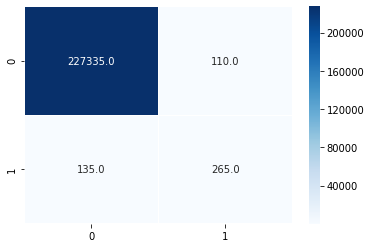

In [119]:
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='.1f', cmap='Blues', linewidths=.01)

In [135]:
print("Training:", logistic_model.score(X_train, y_pred))

Training: 1.0


The model's score is 1 because we don't have enaugth positive value (fraud=1) so we have to make a cross validation

In [151]:
print("Accuracy Training:", accuracy_score(y_train, y_pred))

Accuracy Training: 0.9999078320788255


Accuracy is good but as we have only a few rate of fraud we cannot eveluate with accuray Accuracy (ACC) = 
ΣTP + ΣTN / Σ Total 

In [122]:
(227335 + 265) /  (227335 + 110 + 135 + 265)

0.9989247075862977

On decide donc de faire de la cross validation avec 10 set de data

In [154]:
cv_f1 = cross_val_score(LogisticRegression(), 
                        X_train, y_train, cv=10, scoring="f1")
cv_f1.mean()

0.009225951913120064

# Try the RandomForestModel

On crée un model logistic, on fit le model sur nos données, et on predit le y

In [159]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


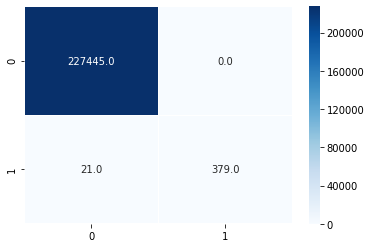

In [145]:
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='.1f', cmap='Blues', linewidths=.01)

In [146]:
print("Accuracy Training:", accuracy_score(y_train, y_pred))

Accuracy Training: 0.9999078320788255


On fait pareil : cross validation

In [160]:
cv_f1 = cross_val_score(RandomForestClassifier(), 
                        X_train, y_train, cv=10, scoring="f1")
cv_f1.mean()

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

0.8308316460580152

Random forest model is even better then linear and logistic regression

# GradientBoostingClassifier

In [ ]:
cv_f1 = cross_val_score(GradientBoostingClassifier(), 
                        X_train, y_train, cv=10, scoring="f1")
cv_f1.mean()

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

# BaggingClassifier

In [ ]:
cv_f1 = cross_val_score(BaggingClassifier(), 
                        X_train, y_train, cv=10, scoring="f1")
cv_f1.mean()

# Choose your model, train it on train dataset then on test dataset

We choose the model which the best score: RandomForestClassifier

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)

In [ ]:
print("Training:", logistic_model.score(X_train, y_pred))

In [ ]:
print("Training:", logistic_model.score(X_train, y_pred))

# Use the model to predict data

Take a random column

In [27]:
random_number = random.randint(0,len(df))
random_col = pd.DataFrame(df.iloc[random_number]).T.drop("Class", axis=1)

Predict if the transaction is fraudulous

In [28]:
clf.predict(random_col)

array([0])

Catch the row and find if your prediction is good

In [29]:
df.iloc[random_number].Class

0.0

# Visualise with ROC

In [30]:
x_min = 0
x_max = len(df)

In [43]:
from sklearn.metrics import f1_score
f1_score(y_test_pred, y_test)

0.872093023255814

In [44]:
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test_pred, y_test))

0.9686005678421996


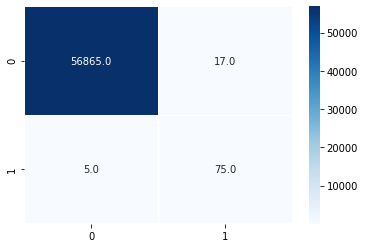

In [46]:
sns.heatmap(confusion_matrix(y_test_pred, y_test), annot=True, fmt='.1f', cmap='Blues', linewidths=.01)

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test_pred, y_test)

In [52]:
from sklearn.metrics import recall_score
recall_score(y_test_pred, y_test)

0.9375

In [53]:
(75/80 + 56865/56882)/2

0.9686005678421996

In [61]:
clf.predict_proba(X_test)[:, 1]

array([0., 0., 0., ..., 0., 0., 0.])

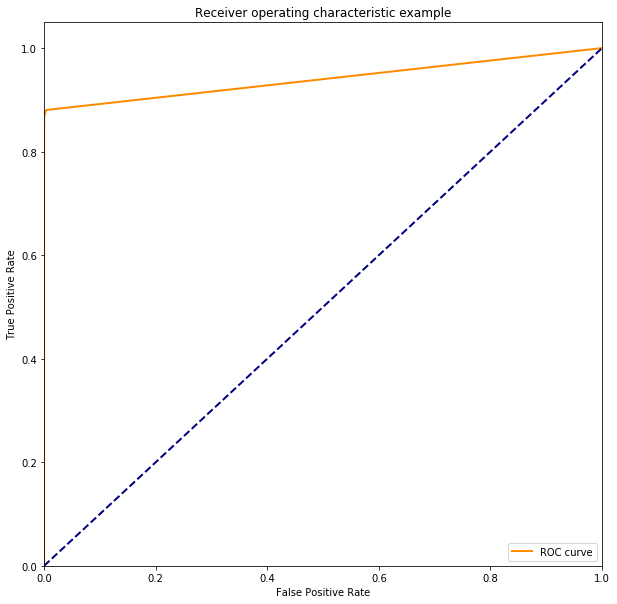

In [74]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
#Plot of a ROC curve for a specific class

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [75]:
fpr, tpr, thresholds

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.75839634e-05,
        8.79198171e-05, 1.05503781e-04, 1.58255671e-04, 2.46175488e-04,
        5.27518903e-04, 3.78055214e-03, 1.00000000e+00]),
 array([0.        , 0.40217391, 0.68478261, 0.79347826, 0.81521739,
        0.83695652, 0.85869565, 0.86956522, 0.86956522, 0.88043478,
        1.        ]),
 array([2. , 1. , 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ]))

In [70]:
y_test_pred_prob = clf.predict_proba(X_test)[:, 1]

In [73]:
y_test_pred_prob[y_test_pred_prob > 0.0]

array([0.1, 0.1, 0.2, 0.1, 0.4, 0.1, 0.1, 0.9, 0.1, 0.8, 0.1, 0.1, 1. ,
       0.1, 0.1, 0.2, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1, 0.6, 0.1, 0.1,
       0.1, 0.8, 0.1, 0.7, 0.7, 1. , 0.1, 0.2, 0.3, 0.7, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.9,
       0.1, 0.2, 0.1, 0.1, 0.6, 0.1, 0.3, 0.1, 1. , 0.1, 0.1, 0.1, 1. ,
       0.1, 0.1, 0.1, 0.5, 0.1, 0.8, 0.1, 0.1, 1. , 0.1, 0.1, 0.7, 0.1,
       0.6, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.8, 0.1, 0.1, 0.4, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.8, 0.1, 1. , 0.1, 0.1, 0.1, 0.9, 0.9,
       0.1, 0.1, 0.6, 0.1, 0.1, 1. , 0.1, 0.1, 1. , 0.1, 0.8, 0.1, 0.1,
       0.3, 0.1, 0.1, 1. , 1. , 0.2, 0.1, 0.1, 0.3, 0.1, 0.9, 1. , 0.4,
       0.9, 0.7, 0.7, 0.1, 0.1, 0.1, 1. , 0.1, 0.1, 0.6, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.8, 1. , 0.4, 0.1, 0.1, 0.1, 0.1, 1. , 1. , 0.1, 0.7,
       0.8, 0.1, 0.1, 0.1, 0.1, 0.1, 1. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.9, 0.1, 0.1, 0.1, 0.1, 1. , 0.1, 0.1, 1. , 0.

# Save the model

In [ ]:
credit_card_rf = open("creditcard.sav","wb")
pickle.dump(clf, credit_card_rf)
credit_card_rf.close()